# Introduction
#### describe which dataset and variables you selected and why

For this assignment, the dataset "IBM HR Analytics Employee Attrition & Performance" has been used. 

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from sklearn.linear_model import LinearRegression #This is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df[['Attrition', 'DistanceFromHome', 'Gender', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany']]
df.head()

ImportError: cannot import name 'export' from 'sklearn.tree' (C:\Users\leaba\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In regards to possible correlations, those variables were chosen based on the following:
- Attrition: important to know whether or not the employee quit the job
- Distance from Home: According to a study, geographical distance increases quit propensity (https://bpspsychub.onlinelibrary.wiley.com/doi/full/10.1111/joop.12047?casa_token=OSw1MgXlNqMAAAAA%3A3Eico-i9_S-f6elL2paFqGs3Z5q9i2spnY-q7ldXy30KI9a7RuplYTi3Rcj1AvRHio1xEk530YZP-yk)
- Gender, Job Satisfaction, & Work Life Balance: According to a study, gender and department climate on job Satisfaction play a role in quitting the job for Faculty in Science and Engineering Fields https://link.springer.com/article/10.1007/s10961-006-7208-y
- Monthly Income:
- Percent Salary Hike:
- Years at Company: The hypothesis is that the longer you already worked at a company, the less keen you are on quitting your job due to multiple reason, e.g. "emotional attachment"

# Data Cleaning
#### describe any data cleaning steps

In [2]:
df_numeric = df[['DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany']]

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

gender_encoder = OneHotEncoder()
gender_reshaped = np.array(df['Gender']).reshape(-1, 1)
gender_values = gender_encoder.fit_transform(gender_reshaped)

attrition_encoder = OneHotEncoder()
attrition_reshaped = np.array(df['Attrition']).reshape(-1, 1)
attrition_values = attrition_encoder.fit_transform(attrition_reshaped)

In [4]:
gender = pd.DataFrame(gender_values.toarray(), columns=['Female', 'Male'])
attrition = pd.DataFrame(attrition_values.toarray(), columns=['Yes', 'No'])

# Combine all categorical columns as one dataframe
df_categorical_encoded = pd.concat([gender, attrition], axis=1)
print(df_categorical_encoded.shape)
df_categorical_encoded.head()

(1470, 4)


,Female,Male,Yes,No
0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0


In [5]:
df1 = pd.concat([df_numeric, df_categorical_encoded], axis=1)
df1.head()

,DistanceFromHome,JobSatisfaction,MonthlyIncome,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,Female,Male,Yes,No
0,1,4,5993,11,1,6,1.0,0.0,0.0,1.0
1,8,2,5130,23,3,10,0.0,1.0,1.0,0.0
2,2,3,2090,15,3,0,0.0,1.0,0.0,1.0
3,3,3,2909,11,3,8,1.0,0.0,1.0,0.0
4,2,2,3468,12,3,2,0.0,1.0,1.0,0.0


# Exploratory data analysis
#### present relevant grahs and tables with respect to your problem

In [14]:
df1.rename(columns={'Yes': 'Dismissed', 'No': 'Employed'}, inplace=True)

,DistanceFromHome,JobSatisfaction,MonthlyIncome,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,Female,Male,Dismissed,Employed
0,1,4,5993,11,1,6,1.0,0.0,0.0,1.0
1,8,2,5130,23,3,10,0.0,1.0,1.0,0.0
2,2,3,2090,15,3,0,0.0,1.0,0.0,1.0
3,3,3,2909,11,3,8,1.0,0.0,1.0,0.0
4,2,2,3468,12,3,2,0.0,1.0,1.0,0.0


In [6]:
corr = df1[['DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany', 'Female', 'Male', 'Dismissed', 'Employed']].corr()
print(corr)

                   DistanceFromHome  JobSatisfaction  MonthlyIncome  \
DistanceFromHome           1.000000        -0.003669      -0.017014   
JobSatisfaction           -0.003669         1.000000      -0.007157   
MonthlyIncome             -0.017014        -0.007157       1.000000   
PercentSalaryHike          0.040235         0.020002      -0.027269   
WorkLifeBalance           -0.026556        -0.019459       0.030683   
YearsAtCompany             0.009508        -0.003803       0.514285   
Female                     0.001851        -0.033252       0.031858   
Male                      -0.001851         0.033252      -0.031858   
Yes                       -0.077924         0.103481       0.159840   
No                         0.077924        -0.103481      -0.159840   

                   PercentSalaryHike  WorkLifeBalance  YearsAtCompany  \
DistanceFromHome            0.040235        -0.026556        0.009508   
JobSatisfaction             0.020002        -0.019459       -0.003803   

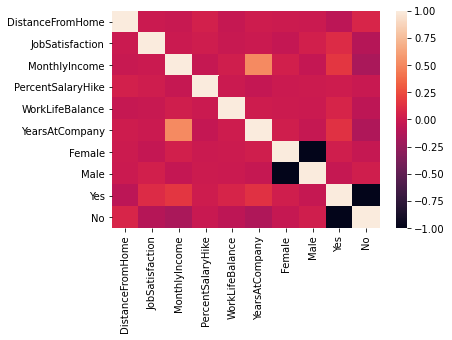

In [7]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

The only strong correlation can be found between "Years at Company" & "Monthly Income".

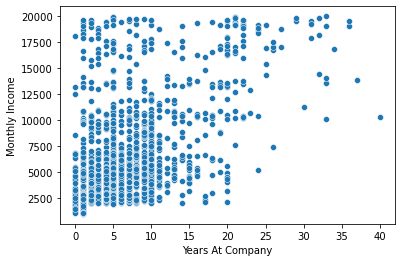

In [8]:
sns.scatterplot(x='YearsAtCompany',y='MonthlyIncome',data=df1)
plt.xlabel('Years At Company')
plt.ylabel('Monthly Income')
plt.show()

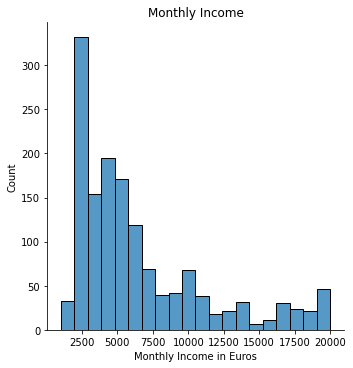

In [9]:
sns.displot(df1['MonthlyIncome'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Monthly Income')
plt.xlabel('Monthly Income in Euros')
plt.ylabel('Count')
plt.show()

C:\Users\leaba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


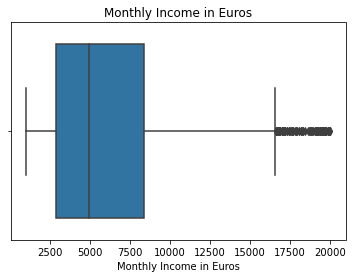

In [12]:
sns.boxplot(df1['MonthlyIncome'])
plt.title('Monthly Income in Euros')
plt.xlabel('Monthly Income in Euros')
plt.show()

In [11]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df1['YearsAtCompany'],df1['MonthlyIncome']))

(0.5142848257331969, 4.819313789730835e-100)


The output gives us two numbers: r = 0.51, and p = 4.81. 

# Predictive model
- Choose one of the following: k-nearest neighbor or random forest
- Explain briefly in your own words how the algorithm works
- Split the data set into a training and test set
- Train the model

In [20]:
X = df1[['DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany', 'Female', 'Male']] #create the X matrix

y = df1['Dismissed'] #create the y-variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
X_train.head() #The train data

,DistanceFromHome,JobSatisfaction,MonthlyIncome,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,Female,Male
99,23,2,2042,12,4,3,0.0,1.0
785,20,4,10322,20,3,11,0.0,1.0
918,9,2,19847,24,2,29,0.0,1.0
1335,19,4,3902,14,3,2,0.0,1.0
1182,1,3,4374,15,3,3,1.0,0.0


### k-nearest Neighbor
The algorithm knN classifies a sample based on the category of its nearest neighbour. Meaning that you identify one object in a "room" and then take a specific amount (k) that are closest to that object as your sample. However, this can be biased as it might only be a coincidence that those objects are very similiar even though the other 95% of objects in that room are not the same as the specific original object.
In Market Research, knN is similiar to Convenience Sampling.

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
sns.set()

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_test, y_test) #calculate the fit on the test data

0.7959183673469388

In [27]:
from sklearn.metrics import classification_report

for i in range(1,11): # 1,11 means to display the different scores with 1 to 11 neighbor(s)
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))

With 1 neighbors the result is:
              precision    recall  f1-score   support

         0.0       0.23      0.23      0.23        77
         1.0       0.84      0.84      0.84       364

    accuracy                           0.73       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.73      0.73      0.73       441

With 2 neighbors the result is:
              precision    recall  f1-score   support

         0.0       0.24      0.43      0.31        77
         1.0       0.86      0.72      0.78       364

    accuracy                           0.67       441
   macro avg       0.55      0.57      0.55       441
weighted avg       0.75      0.67      0.70       441

With 3 neighbors the result is:
              precision    recall  f1-score   support

         0.0       0.31      0.16      0.21        77
         1.0       0.84      0.93      0.88       364

    accuracy                           0.79       441
   macro avg       0.57      0.5

Based on the Accuracy Score, it seems that 9 or 10 neighbors give the best result (0.82).

#### Random Forest
The random forest is a classification algorithm consisting of many decisions trees. It uses randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. 
In Market Research, Random Forest is similiar to Simple Random Sampling.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [29]:
rf.score(X_test,y_test)

0.8344671201814059

In [30]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['Employed (actual)', 'Dismissed (actual)'], columns = ['Employed (pred)', 'Dismissed (pred)']) #label and make df
cm

,Employed (pred),Dismissed (pred)
Employed (actual),11,66
Dismissed (actual),7,357


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.14      0.23        77
         1.0       0.84      0.98      0.91       364

    accuracy                           0.83       441
   macro avg       0.73      0.56      0.57       441
weighted avg       0.80      0.83      0.79       441



The precision for dismissed (1.0) is good (0.84): about 16% of the suspected dismissed cases turn out not to be dismissed - hence, 16% of the employees were not actually dismissed and were still kept employed.

The recall is very good - only 2% of the dismissed cases are missed.

# Conclusion
Comparing knN to Random Forest, the accuracy is better with Random Forest (0.83) - even though it is not still an acceptable score to predict a certain outcome. Hence, the model needs to be trained better. 